In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr

from google.colab import files
uploaded = files.upload()


Saving dataset.xlsx to dataset.xlsx


In [ ]:
df = pd.read_excel("dataset.xlsx",engine="openpyxl")
df = df.dropna(axis="columns", how = "all")
df = df.dropna(axis="rows", how = "all")
df.round(4).head(3)

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22.0,17.0,3.0,169.0,1.4,1.0,0.3646,2.0000,5.8021,27.2608,3.5679,3.4277,4.3678,21.2526,5.4645,1.9688
1,AndroidAsyncHTTP-master,11.0,20.0,14.0,494.0,4.7,6.0,0.4747,2.2089,24.0063,25.9965,10.3363,3.1725,2.7272,17.4304,5.1585,2.1772
2,android-pdf-viewer-master,2.0,1.0,0.0,4.0,0.0,12.2,0.0000,0.5000,1.8333,18.2800,4.5600,1.7273,3.4545,9.6667,2.5600,1.6667


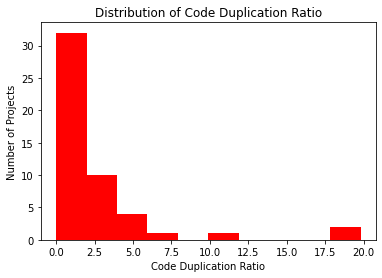

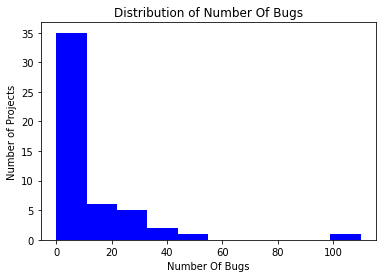

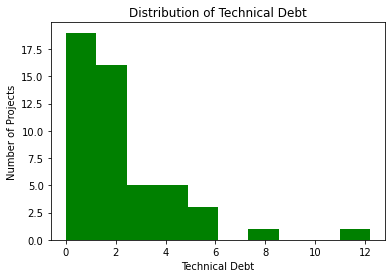

In [ ]:
del df["Name"]
metric_names = {"NOB": "Number Of Bugs", "V": "Vulnerabilities", "SH": "Security Hotspots", "CS": "Code Smell Issues",
"CDR": "Code Duplication Ratio", "TD": "Technical Debt", "NOC": "Number Of Children", "CBO": "Coupling Between Object Classes",
"RFC": "Response for a Class", "LOC": "Lıne of Code", "CLOC": "Comment Lines of Code", "FanIn": "Internal Coupling (FanIn)",
"FanOut": "External Coupling of a Class (FanOut)", "LCOM": "Lack of Cohension in Methods", "WMC": "Weighted Method Per Class", "DIT": "Depth of Inheritance Tree"}


def plotHist(columnName,colorName):
    df[columnName].plot(kind="hist",color=colorName)
    plt.title("Distribution of {}".format(metric_names[columnName]))
    plt.xlabel(metric_names[columnName])
    plt.ylabel("Number of Projects")
    plt.show()
        
#STEP 1
plotHist("CDR","red")
plotHist("NOB","blue")
plotHist("TD","green")
# From these histograms it can be seen that the relationship is monotonic. Because if it were linear, then it would have a constant slope 

In [ ]:
td_external = df[["CDR","TD","NOB","V","SH","CS"]].copy()

td_internal = df[["CDR","TD","NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"]].copy()

In [ ]:
# STEP 2

scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df.values)
sdf = pd.DataFrame(scaled_df,index=df.index,columns=df.columns)

scaled_td_internal = scaler.fit_transform(td_internal.values)
std_internal = pd.DataFrame(scaled_td_internal,index=td_internal.index,columns=td_internal.columns)

scaled_td_external = scaler.fit_transform(td_external.values)
std_external = pd.DataFrame(scaled_td_external,index=td_external.index,columns=td_external.columns)

sdf.round(4)

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,0.2000,0.0556,0.0698,0.0845,0.0707,0.0820,0.4504,0.5473,0.2417,0.3286,0.2156,0.4672,0.6783,0.4830,0.4933,0.9043
1,0.1000,0.0654,0.3256,0.2470,0.2374,0.4918,0.5864,0.6045,1.0000,0.2953,0.6246,0.4324,0.4235,0.3961,0.4657,1.0000
2,0.0182,0.0033,0.0000,0.0020,0.0000,1.0000,0.0000,0.1368,0.0764,0.0917,0.2755,0.2354,0.5365,0.2197,0.2311,0.7655
3,0.0091,0.0033,0.0233,0.0030,0.0000,0.1721,0.1029,0.2737,0.1770,0.1043,0.2046,0.4116,0.3624,0.2008,0.2992,0.7655
4,0.0000,0.0196,0.0000,0.1265,0.1717,0.3443,0.0446,0.7781,0.0883,0.8340,1.0000,1.0000,0.8859,0.2480,1.0000,0.4150
5,0.0364,0.0588,0.1628,0.0500,0.1919,0.2541,0.2471,0.5145,0.2799,0.7553,0.1765,0.5327,0.7797,0.4279,0.7458,0.8451
6,0.1364,0.0098,0.0000,0.0775,0.1515,0.0820,0.2989,0.6820,0.3383,0.5733,0.6920,0.5415,0.6650,0.5284,0.5247,0.7260
7,0.0091,0.0000,0.0000,0.0345,0.0505,0.0164,0.0000,0.0000,0.0000,1.0000,0.1032,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.3091,1.0000,1.0000,1.0000,0.5101,0.1393,0.6187,1.0000,0.3322,0.7162,0.3372,0.7435,0.6330,0.3918,0.8263,0.6924
9,0.0000,0.0392,0.1860,0.0670,0.0000,0.2459,0.3154,0.5968,0.2526,0.1109,0.1277,0.3747,0.4738,0.3709,0.3086,0.5179


In [ ]:
# STEP 3

# This is the correlation of scaled data
sdf.corr(method="spearman").round(4)

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.0000,0.6947,0.5876,0.6913,0.3733,0.1334,0.4079,0.3534,0.4472,0.3499,0.3690,0.4585,0.2771,0.0627,0.5074,0.2460
V,0.6947,1.0000,0.6297,0.6242,0.2804,0.2968,0.4090,0.4262,0.3460,0.2436,0.2086,0.4686,0.2896,0.0298,0.3978,0.1108
SH,0.5876,0.6297,1.0000,0.6185,0.3847,-0.0265,0.5129,0.3919,0.4255,0.1292,0.2041,0.2787,0.1561,-0.0161,0.3494,0.1077
CS,0.6913,0.6242,0.6185,1.0000,0.5481,0.1946,0.4029,0.5774,0.4929,0.4405,0.2606,0.4569,0.3885,0.0655,0.5699,0.2188
CDR,0.3733,0.2804,0.3847,0.5481,1.0000,0.0134,0.1927,0.2120,0.2410,0.3285,0.1718,0.2437,0.2372,-0.0387,0.3436,0.1233
TD,0.1334,0.2968,-0.0265,0.1946,0.0134,1.0000,-0.1797,0.0137,-0.1264,-0.0311,0.1143,0.2391,0.2401,0.0172,0.1276,0.3520
NOC,0.4079,0.4090,0.5129,0.4029,0.1927,-0.1797,1.0000,0.6673,0.5841,-0.1202,0.2973,0.2683,-0.0744,-0.0135,0.1735,-0.1638
CBO,0.3534,0.4262,0.3919,0.5774,0.2120,0.0137,0.6673,1.0000,0.4212,0.1770,0.2504,0.5946,0.2410,0.1097,0.4926,0.0001
RFC,0.4472,0.3460,0.4255,0.4929,0.2410,-0.1264,0.5841,0.4212,1.0000,0.1346,0.3816,0.4149,0.0726,0.4441,0.5294,0.2374
LOC,0.3499,0.2436,0.1292,0.4405,0.3285,-0.0311,-0.1202,0.1770,0.1346,1.0000,0.1267,0.5543,0.6187,-0.0655,0.6782,0.1811


In [ ]:
# STEP 4

# This is the p-values of scaled data
coef, p = spearmanr(sdf)
np.set_printoptions(suppress=True)
print("P-values of the data: ")
print()
p_values = pd.DataFrame(p,index=df.columns,columns=df.columns)
p_values.round(4)
#np.round(p, 4)

P-values of the data: 



,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


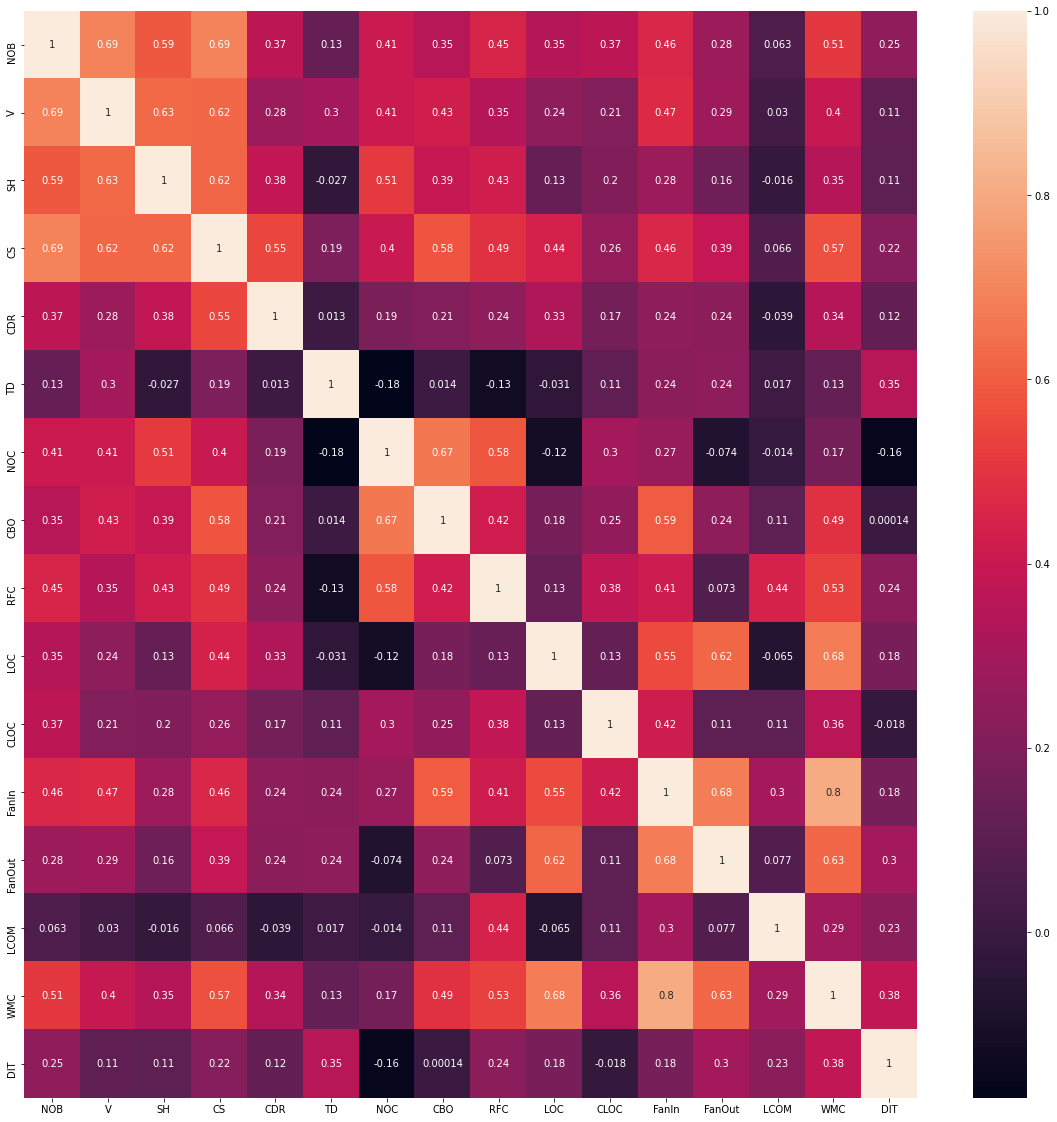

In [ ]:
# STEP 5

# This is the correlation heatmap of scaled data
plt.figure(figsize=(20,20))
sns.heatmap(sdf.corr(method="spearman"),annot=True)
plt.show()

In [ ]:
# STEP 6

# This is the correlation table of external metrics
std_external.corr(method="spearman").round(4)

,CDR,TD,NOB,V,SH,CS
CDR,1.0000,0.0134,0.3733,0.2804,0.3847,0.5481
TD,0.0134,1.0000,0.1334,0.2968,-0.0265,0.1946
NOB,0.3733,0.1334,1.0000,0.6947,0.5876,0.6913
V,0.2804,0.2968,0.6947,1.0000,0.6297,0.6242
SH,0.3847,-0.0265,0.5876,0.6297,1.0000,0.6185
CS,0.5481,0.1946,0.6913,0.6242,0.6185,1.0000


In [ ]:
# STEP 7

# This is thecorrelation table of internal metrics
std_internal.corr(method="spearman").round(4)

,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.0000,0.0134,0.1927,0.2120,0.2410,0.3285,0.1718,0.2437,0.2372,-0.0387,0.3436,0.1233
TD,0.0134,1.0000,-0.1797,0.0137,-0.1264,-0.0311,0.1143,0.2391,0.2401,0.0172,0.1276,0.3520
NOC,0.1927,-0.1797,1.0000,0.6673,0.5841,-0.1202,0.2973,0.2683,-0.0744,-0.0135,0.1735,-0.1638
CBO,0.2120,0.0137,0.6673,1.0000,0.4212,0.1770,0.2504,0.5946,0.2410,0.1097,0.4926,0.0001
RFC,0.2410,-0.1264,0.5841,0.4212,1.0000,0.1346,0.3816,0.4149,0.0726,0.4441,0.5294,0.2374
LOC,0.3285,-0.0311,-0.1202,0.1770,0.1346,1.0000,0.1267,0.5543,0.6187,-0.0655,0.6782,0.1811
CLOC,0.1718,0.1143,0.2973,0.2504,0.3816,0.1267,1.0000,0.4168,0.1096,0.1076,0.3551,-0.0179
FanIn,0.2437,0.2391,0.2683,0.5946,0.4149,0.5543,0.4168,1.0000,0.6793,0.2964,0.8029,0.1794
FanOut,0.2372,0.2401,-0.0744,0.2410,0.0726,0.6187,0.1096,0.6793,1.0000,0.0770,0.6263,0.2954
LCOM,-0.0387,0.0172,-0.0135,0.1097,0.4441,-0.0655,0.1076,0.2964,0.0770,1.0000,0.2913,0.2293


In [ ]:
# PART 2

# I split the data into train and test at the beginning of each metric category

# STEP 2

random_state_fixed = 53

def plotGraph(x_train,y_train,y_test,y_pred,name,metric,type):
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r_squared = r2_score(y_test,y_pred)
    title = name + " Root Mean Squared Error: " + str(rmse) + "\n" + name + " R^2: " + str(r_squared) + "\n\n" + " Regressor Accuracy of " + name + " " + metric + " " + "with" + " " + type
    plt.title(title)
    plt.scatter(y_test,y_test,color="magenta",label="Original Values")
    plt.scatter(y_test,y_pred,color="orange",label="Predicted Values")
    plt.legend(loc="upper left")
    plt.show()
    
def linearRegressionfunc(x_train,y_train,x_test,y_test):
    reg1 = LinearRegression()
    reg1.fit(x_train,y_train)
    y_pred1 = reg1.predict(x_test)
    return y_pred1

def svrregressionrbf(x_train,y_train,x_test,y_test):
    reg2 = SVR(kernel="rbf")
    reg2.fit(x_train,y_train)
    y_pred2 = reg2.predict(x_test)
    return y_pred2

def svrregressionlinear(x_train,y_train,x_test,y_test):
    reg3 = SVR(kernel="linear")
    reg3.fit(x_train,y_train)
    y_pred3 = reg3.predict(x_test)
    return y_pred3

def desiciontreeregressionfunc(x_train,y_train,x_test,y_test):
    reg4 = DecisionTreeRegressor(random_state=random_state_fixed)
    reg4.fit(x_train,y_train)
    y_pred4 = reg4.predict(x_test)
    return y_pred4

def randomdectreeregression(x_train,y_train,x_test,y_test):
    reg5 = RandomForestRegressor(random_state=random_state_fixed)
    reg5.fit(x_train,y_train)
    y_pred5 = reg5.predict(x_test)
    return y_pred5

def mlpregression(x_train,y_train,x_test,y_test):
    reg6 = MLPRegressor(random_state=random_state_fixed)
    reg6.fit(x_train,y_train)
    y_pred6 = reg6.predict(x_test)
    return y_pred6

In [ ]:
# STEP 3

# Internal metrics

internaldf1 = std_internal.copy()
del internaldf1["CDR"]

internaldf2 = std_internal.copy()
del internaldf2["TD"]

x5 = internaldf1.iloc[:,internaldf1.columns != "TD"]
y5 = internaldf1.iloc[:,0]

x6 = internaldf2.iloc[:,internaldf2.columns != "CDR"]
y6 = internaldf2.iloc[:,0]


x5_train, x5_test, y5_train, y5_test = train_test_split(x5,y5,test_size=0.3,random_state=random_state_fixed)
x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6,test_size=0.3,random_state=random_state_fixed)



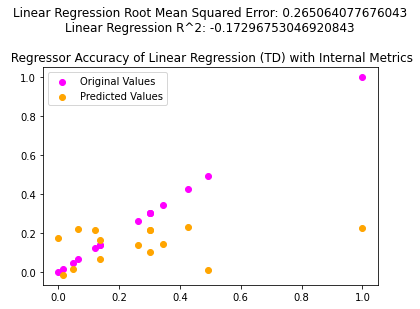

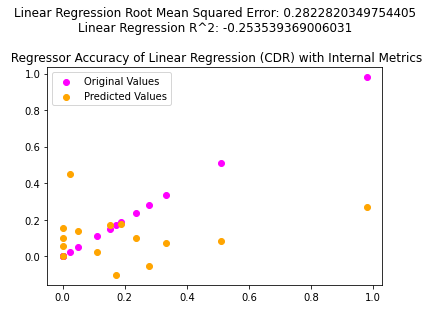

In [ ]:
# Internal Metrics Linear Regression
plotGraph(x5_train,y5_train,y5_test,linearRegressionfunc(x5_train,y5_train,x5_test,y5_test),"Linear Regression","(TD)","Internal Metrics")  

plotGraph(x6_train,y6_train,y6_test,linearRegressionfunc(x6_train,y6_train,x6_test,y6_test),"Linear Regression","(CDR)","Internal Metrics")   

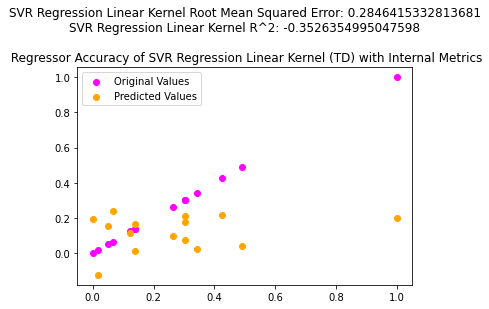

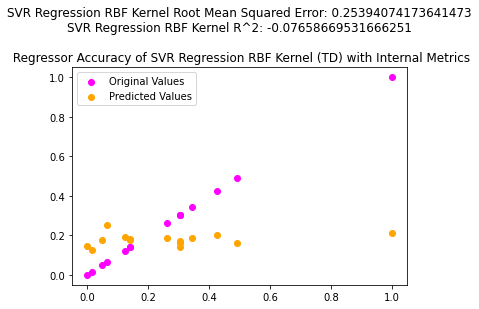

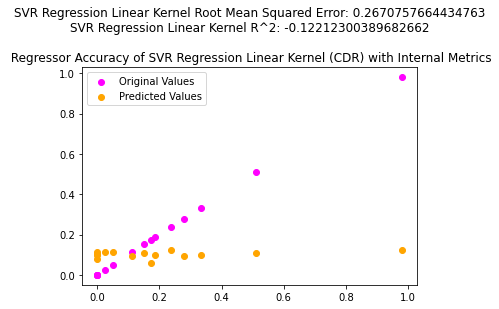

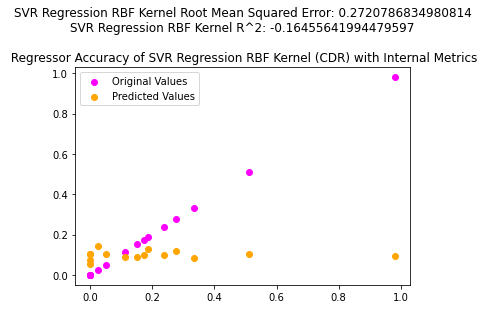

In [ ]:
# Internal Metrics SVR Regression
plotGraph(x5_train,y5_train,y5_test,svrregressionlinear(x5_train,y5_train,x5_test,y5_test),"SVR Regression Linear Kernel","(TD)","Internal Metrics")

plotGraph(x5_train,y5_train,y5_test,svrregressionrbf(x5_train,y5_train,x5_test,y5_test),"SVR Regression RBF Kernel","(TD)","Internal Metrics")



plotGraph(x6_train,y6_train,y6_test,svrregressionlinear(x6_train,y6_train,x6_test,y6_test),"SVR Regression Linear Kernel","(CDR)","Internal Metrics")

plotGraph(x6_train,y6_train,y6_test,svrregressionrbf(x6_train,y6_train,x6_test,y6_test),"SVR Regression RBF Kernel","(CDR)","Internal Metrics")

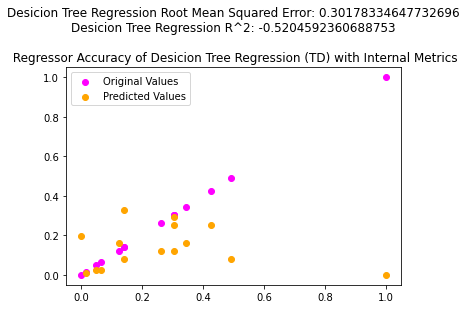

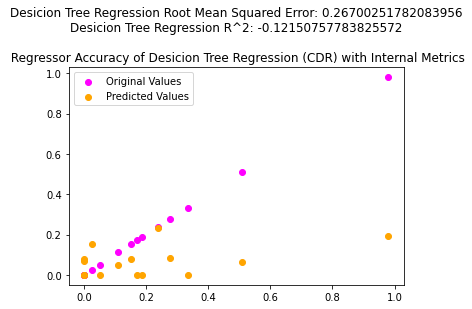

In [ ]:
# Internal Metrics Desicion Tree Regression
plotGraph(x5_train,y5_train,y5_test,desiciontreeregressionfunc(x5_train,y5_train,x5_test,y5_test),"Desicion Tree Regression","(TD)","Internal Metrics")

plotGraph(x6_train,y6_train,y6_test,desiciontreeregressionfunc(x6_train,y6_train,x6_test,y6_test),"Desicion Tree Regression","(CDR)","Internal Metrics")

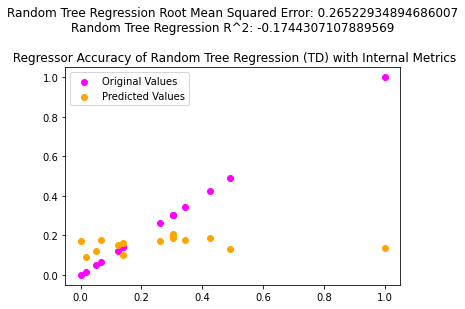

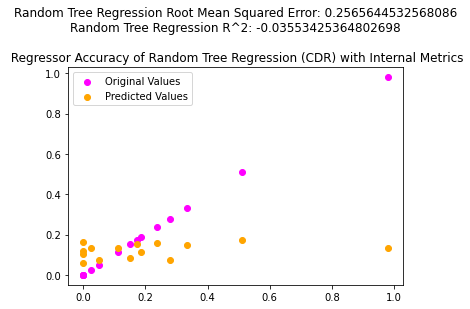

In [ ]:
# Internal Metrics Random Tree Regression
plotGraph(x5_train,y5_train,y5_test,randomdectreeregression(x5_train,y5_train,x5_test,y5_test),"Random Tree Regression","(TD)","Internal Metrics")


plotGraph(x6_train,y6_train,y6_test,randomdectreeregression(x6_train,y6_train,x6_test,y6_test),"Random Tree Regression","(CDR)","Internal Metrics")

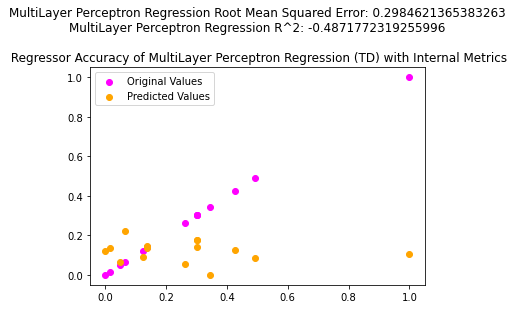

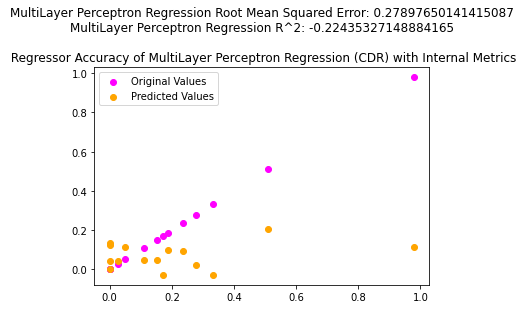

In [ ]:
# Internal Metrics MultiLayer Regression
plotGraph(x5_train,y5_train,y5_test,mlpregression(x5_train,y5_train,x5_test,y5_test),"MultiLayer Perceptron Regression","(TD)","Internal Metrics")


plotGraph(x6_train,y6_train,y6_test,mlpregression(x6_train,y6_train,x6_test,y6_test),"MultiLayer Perceptron Regression","(CDR)","Internal Metrics")

In [ ]:
# STEP 4

# External Metrics

externaldf1 = std_external.copy()
del externaldf1["CDR"]

externaldf2 = std_external.copy()
del externaldf2["TD"]

x3 = externaldf1.iloc[:,externaldf1.columns != "TD"]
y3 = externaldf1.iloc[:,0]

x4 = externaldf2.iloc[:,externaldf2.columns != "CDR"]
y4 = externaldf2.iloc[:,0]


x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.3,random_state=random_state_fixed)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.3,random_state=random_state_fixed)



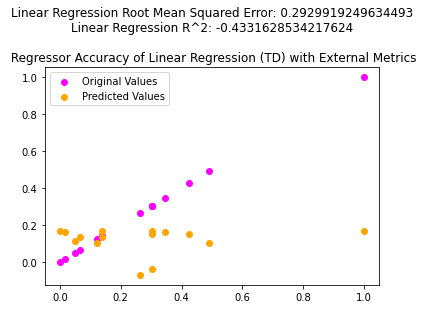

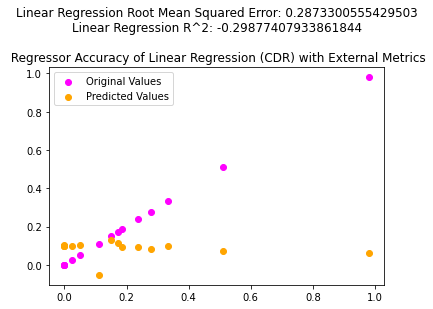

In [ ]:
# External Metrics Linear Regression
plotGraph(x3_train,y3_train,y3_test,linearRegressionfunc(x3_train,y3_train,x3_test,y3_test),"Linear Regression","(TD)","External Metrics")   

plotGraph(x4_train,y4_train,y4_test,linearRegressionfunc(x4_train,y4_train,x4_test,y4_test),"Linear Regression","(CDR)","External Metrics")   


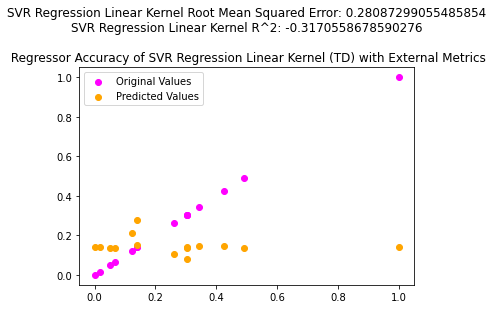

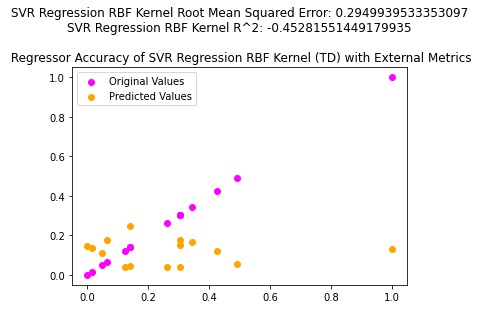

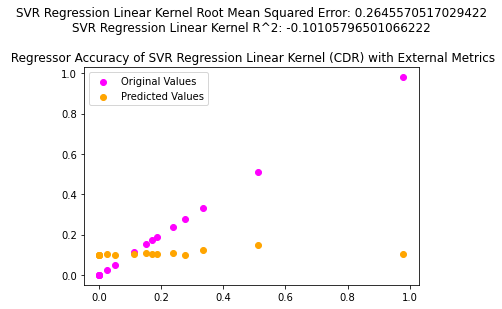

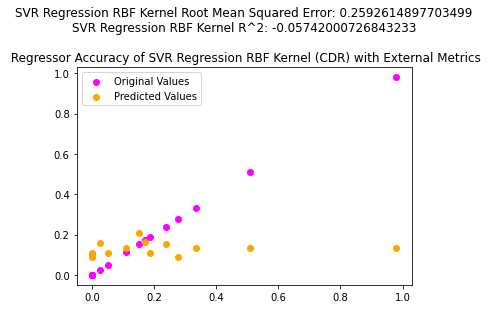

In [ ]:
# External Metrics SVR Regression
plotGraph(x3_train,y3_train,y3_test,svrregressionlinear(x3_train,y3_train,x3_test,y3_test),"SVR Regression Linear Kernel","(TD)","External Metrics")

plotGraph(x3_train,y3_train,y3_test,svrregressionrbf(x3_train,y3_train,x3_test,y3_test),"SVR Regression RBF Kernel","(TD)","External Metrics")


plotGraph(x4_train,y4_train,y4_test,svrregressionlinear(x4_train,y4_train,x4_test,y4_test),"SVR Regression Linear Kernel","(CDR)","External Metrics")

plotGraph(x4_train,y4_train,y4_test,svrregressionrbf(x4_train,y4_train,x4_test,y4_test),"SVR Regression RBF Kernel","(CDR)","External Metrics")

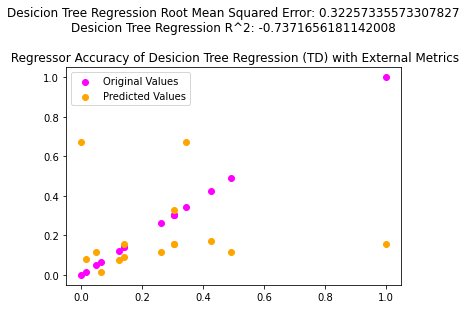

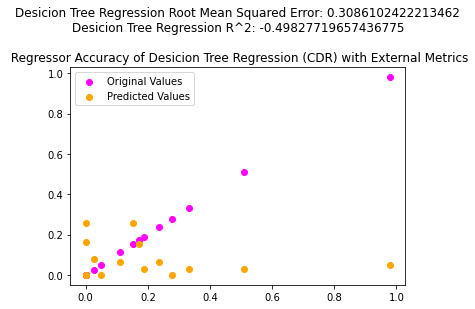

In [ ]:
# External Metrics Desicion Tree Regression
plotGraph(x3_train,y3_train,y3_test,desiciontreeregressionfunc(x3_train,y3_train,x3_test,y3_test),"Desicion Tree Regression","(TD)","External Metrics")

plotGraph(x4_train,y4_train,y4_test,desiciontreeregressionfunc(x4_train,y4_train,x4_test,y4_test),"Desicion Tree Regression","(CDR)","External Metrics")

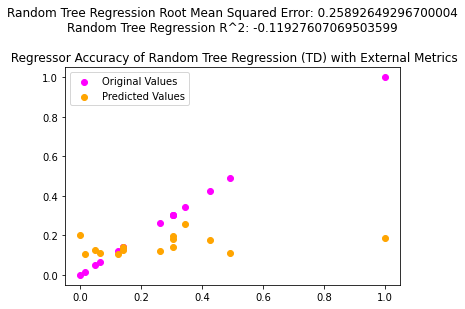

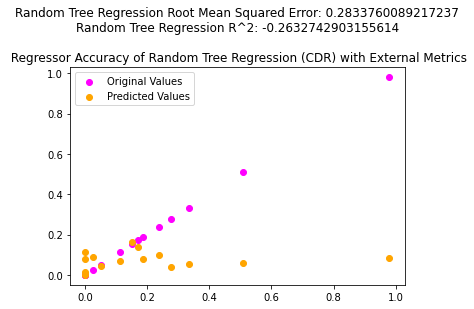

In [ ]:
# External Metrics Random Tree Regression
plotGraph(x3_train,y3_train,y3_test,randomdectreeregression(x3_train,y3_train,x3_test,y3_test),"Random Tree Regression","(TD)","External Metrics")

plotGraph(x4_train,y4_train,y4_test,randomdectreeregression(x4_train,y4_train,x4_test,y4_test),"Random Tree Regression","(CDR)","External Metrics")


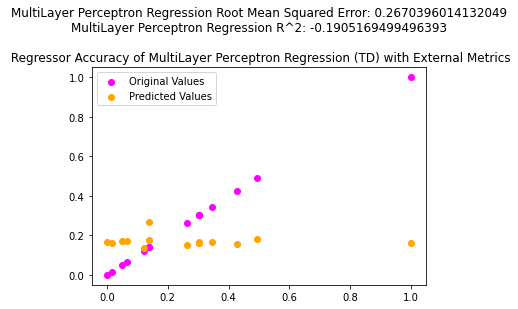

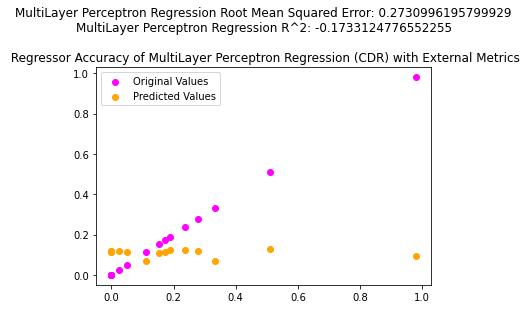

In [ ]:
# External Metrics MultiLayer Regression
plotGraph(x3_train,y3_train,y3_test,mlpregression(x3_train,y3_train,x3_test,y3_test),"MultiLayer Perceptron Regression","(TD)","External Metrics")

plotGraph(x4_train,y4_train,y4_test,mlpregression(x4_train,y4_train,x4_test,y4_test),"MultiLayer Perceptron Regression","(CDR)","External Metrics")


In [ ]:
# STEP 5

# All Metrics

sdf3 = sdf.copy()
del sdf3["CDR"]

# ONLY CDR
sdf4 = sdf.copy()
del sdf4["TD"]

x1 = sdf3.iloc[:,sdf3.columns!="TD"].values
y1 = sdf3.iloc[:,4].values

x2 = sdf4.iloc[:,sdf4.columns!="CDR"].values
y2 = sdf4.iloc[:,4].values


x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.3,random_state=random_state_fixed)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.3,random_state=random_state_fixed)



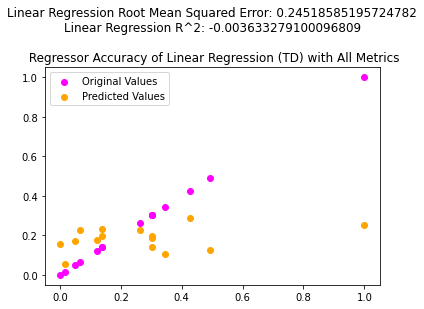

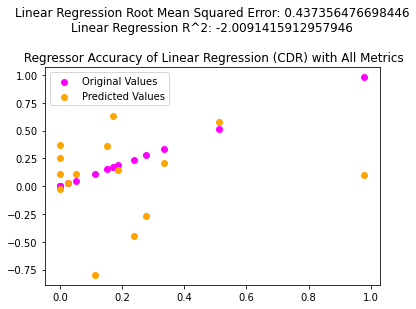

In [ ]:
# All Metrics Linear Regression
plotGraph(x1_train,y1_train,y1_test,linearRegressionfunc(x1_train,y1_train,x1_test,y1_test),"Linear Regression","(TD)","All Metrics")   

plotGraph(x2_train,y2_train,y2_test,linearRegressionfunc(x2_train,y2_train,x2_test,y2_test),"Linear Regression","(CDR)","All Metrics")   


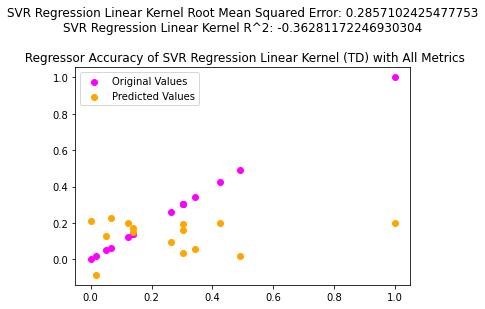

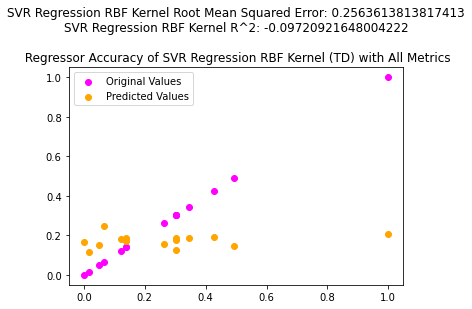

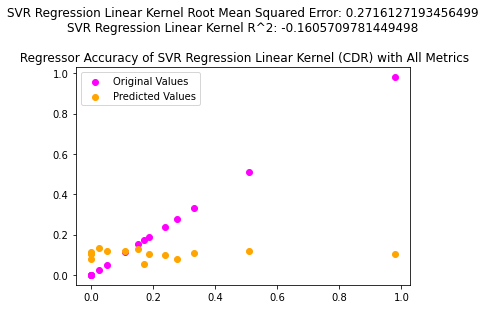

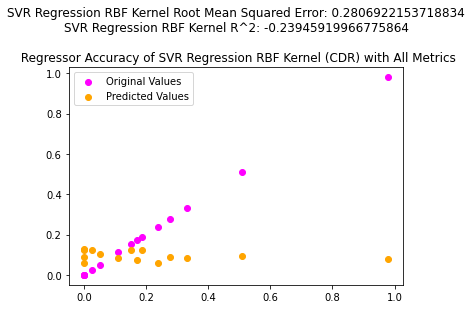

In [ ]:
# All Metrics SVR Regression
plotGraph(x1_train,y1_train,y1_test,svrregressionlinear(x1_train,y1_train,x1_test,y1_test),"SVR Regression Linear Kernel","(TD)","All Metrics")

plotGraph(x1_train,y1_train,y1_test,svrregressionrbf(x1_train,y1_train,x1_test,y1_test),"SVR Regression RBF Kernel","(TD)","All Metrics")


plotGraph(x2_train,y2_train,y2_test,svrregressionlinear(x2_train,y2_train,x2_test,y2_test),"SVR Regression Linear Kernel","(CDR)","All Metrics")

plotGraph(x2_train,y2_train,y2_test,svrregressionrbf(x2_train,y2_train,x2_test,y2_test),"SVR Regression RBF Kernel","(CDR)","All Metrics")

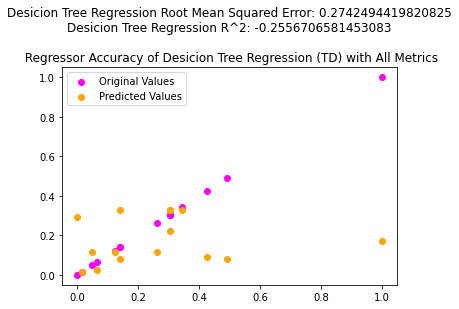

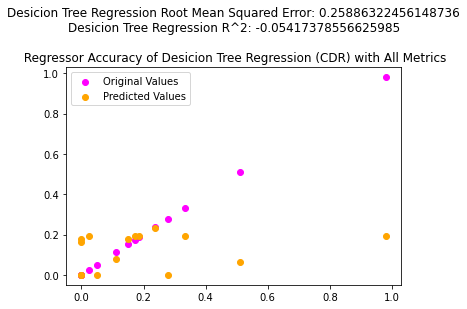

In [ ]:
# All Metrics LDesicion Tree Regression
plotGraph(x1_train,y1_train,y1_test,desiciontreeregressionfunc(x1_train,y1_train,x1_test,y1_test),"Desicion Tree Regression","(TD)","All Metrics")

plotGraph(x2_train,y2_train,y2_test,desiciontreeregressionfunc(x2_train,y2_train,x2_test,y2_test),"Desicion Tree Regression","(CDR)","All Metrics")

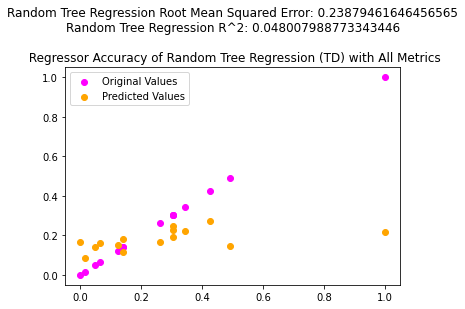

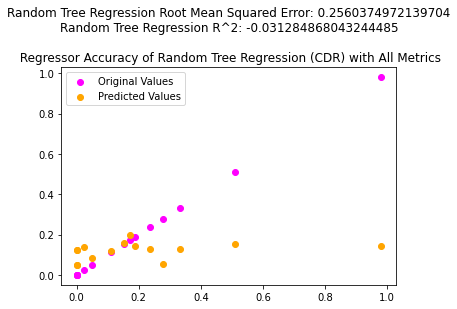

In [ ]:
# All Metrics Random Tree Regression
plotGraph(x1_train,y1_train,y1_test,randomdectreeregression(x1_train,y1_train,x1_test,y1_test),"Random Tree Regression","(TD)","All Metrics")

plotGraph(x2_train,y2_train,y2_test,randomdectreeregression(x2_train,y2_train,x2_test,y2_test),"Random Tree Regression","(CDR)","All Metrics")

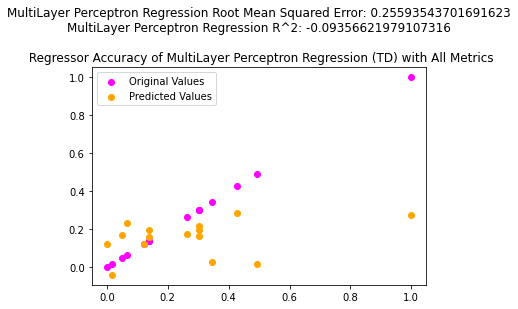

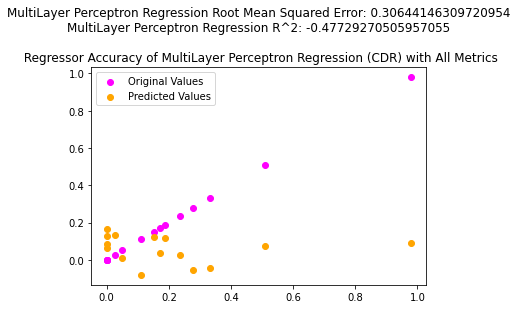

In [ ]:
# All Metrics MultiLayer Regression
plotGraph(x1_train,y1_train,y1_test,mlpregression(x1_train,y1_train,x1_test,y1_test),"MultiLayer Perceptron Regression","(TD)","All Metrics")

plotGraph(x2_train,y2_train,y2_test,mlpregression(x2_train,y2_train,x2_test,y2_test),"MultiLayer Perceptron Regression","(CDR)","All Metrics")